In [1]:
library(tidyquant)
library(tidyverse)
library(tsibble)
library(fable)
library(feasts)

Loading required package: lubridate


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr   1.1.4     v readr   2.1.5
v forcats 1.0.0     v stringr 1.5.0
v ggplot2 3.4.2     v tibble  3.2.1
v purrr   1.0.2     v tidyr   1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks s

In [2]:
data = tq_get(c("AMZN", "DIS"), get = "stock.prices", from = "2023-01-01", to = "2024-03-29") %>% select(symbol, date, adjusted)
data

symbol,date,adjusted
<chr>,<date>,<dbl>
AMZN,2023-01-03,85.82
AMZN,2023-01-04,85.14
AMZN,2023-01-05,83.12
AMZN,2023-01-06,86.08
AMZN,2023-01-09,87.36
AMZN,2023-01-10,89.87
AMZN,2023-01-11,95.09
AMZN,2023-01-12,95.27
AMZN,2023-01-13,98.12


In [3]:
data = pivot_wider(data, id_cols = date, names_from = symbol, values_from = adjusted)
data

date,AMZN,DIS
<date>,<dbl>,<dbl>
2023-01-03,85.82,88.68098
2023-01-04,85.14,91.68121
2023-01-05,83.12,91.62139
2023-01-06,86.08,93.61490
2023-01-09,87.36,94.46214
2023-01-10,89.87,95.24957
2023-01-11,95.09,96.01707
2023-01-12,95.27,99.48576
2023-01-13,98.12,99.07710


In [4]:
data = mutate(data, t = row_number())
data

date,AMZN,DIS,t
<date>,<dbl>,<dbl>,<int>
2023-01-03,85.82,88.68098,1
2023-01-04,85.14,91.68121,2
2023-01-05,83.12,91.62139,3
2023-01-06,86.08,93.61490,4
2023-01-09,87.36,94.46214,5
2023-01-10,89.87,95.24957,6
2023-01-11,95.09,96.01707,7
2023-01-12,95.27,99.48576,8
2023-01-13,98.12,99.07710,9


In [5]:
data = pivot_longer(data, c("AMZN", "DIS"), names_to = "symbol", values_to = "adjusted")
data

date,t,symbol,adjusted
<date>,<int>,<chr>,<dbl>
2023-01-03,1,AMZN,85.82000
2023-01-03,1,DIS,88.68098
2023-01-04,2,AMZN,85.14000
2023-01-04,2,DIS,91.68121
2023-01-05,3,AMZN,83.12000
2023-01-05,3,DIS,91.62139
2023-01-06,4,AMZN,86.08000
2023-01-06,4,DIS,93.61490
2023-01-09,5,AMZN,87.36000


In [8]:
data = data %>% group_by(symbol) %>% mutate(t = row_number())
data = as_tsibble(data, index = t, key = symbol)
data

date,t,symbol,adjusted
<date>,<int>,<chr>,<dbl>
2023-01-03,1,AMZN,85.82
2023-01-04,2,AMZN,85.14
2023-01-05,3,AMZN,83.12
2023-01-06,4,AMZN,86.08
2023-01-09,5,AMZN,87.36
2023-01-10,6,AMZN,89.87
2023-01-11,7,AMZN,95.09
2023-01-12,8,AMZN,95.27
2023-01-13,9,AMZN,98.12


In [9]:
fit = data %>% model(NNETAR(adjusted))
filter(fit, symbol == "DIS") %>% report()
report(filter(fit, symbol == "AMZN"))

Series: adjusted 
Model: NNAR(1,1) 

Average of 20 networks, each of which is
a 1-1-1 network with 4 weights
options were - linear output units 

sigma^2 estimated as 2.715
Series: adjusted 
Model: NNAR(1,1) 

Average of 20 networks, each of which is
a 1-1-1 network with 4 weights
options were - linear output units 

sigma^2 estimated as 6.243


In [10]:
accuracy(fit)

symbol,.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AMZN,NNETAR(adjusted),Training,0.0017439867,2.498686,1.884451,-0.03923885,1.491768,1.002265,0.9912372,-0.047307453
DIS,NNETAR(adjusted),Training,0.0001127551,1.647747,1.150932,-0.03046142,1.214787,1.000542,0.9988606,-0.007389307


In [ ]:
fit %>%
  forecast(h = 20) %>%
  autoplot(data)

In [ ]:
fit = data %>% model(NNETAR(adjusted ~ AR(20,0,10)))
report(filter(fit, symbol == "AMZN"))

In [ ]:
accuracy(fit)

In [ ]:
fit %>%
  forecast(h = 20) %>%
  autoplot(data)

In [ ]:
fit = data %>% model(NNETAR(adjusted))
report(filter(fit, symbol == "AMZN"))

In [ ]:
accuracy(fit)

In [ ]:
fit %>%
  forecast(h = 20) %>%
  autoplot(data)

In [ ]:
report(filter(fit, symbol == "AMZN"))

## Bagging Ensamble

In [11]:
data = tq_get(c("AMZN", "DIS"), get = "stock.prices", from = "2023-01-01", to = "2024-03-29") %>% select(symbol, date, adjusted)
data

symbol,date,adjusted
<chr>,<date>,<dbl>
AMZN,2023-01-03,85.82
AMZN,2023-01-04,85.14
AMZN,2023-01-05,83.12
AMZN,2023-01-06,86.08
AMZN,2023-01-09,87.36
AMZN,2023-01-10,89.87
AMZN,2023-01-11,95.09
AMZN,2023-01-12,95.27
AMZN,2023-01-13,98.12


In [12]:
data = data %>% group_by(symbol) %>% mutate(t = row_number())
data
data = as_tsibble(data, index = t, key = symbol)

symbol,date,adjusted,t
<chr>,<date>,<dbl>,<int>
AMZN,2023-01-03,85.82,1
AMZN,2023-01-04,85.14,2
AMZN,2023-01-05,83.12,3
AMZN,2023-01-06,86.08,4
AMZN,2023-01-09,87.36,5
AMZN,2023-01-10,89.87,6
AMZN,2023-01-11,95.09,7
AMZN,2023-01-12,95.27,8
AMZN,2023-01-13,98.12,9


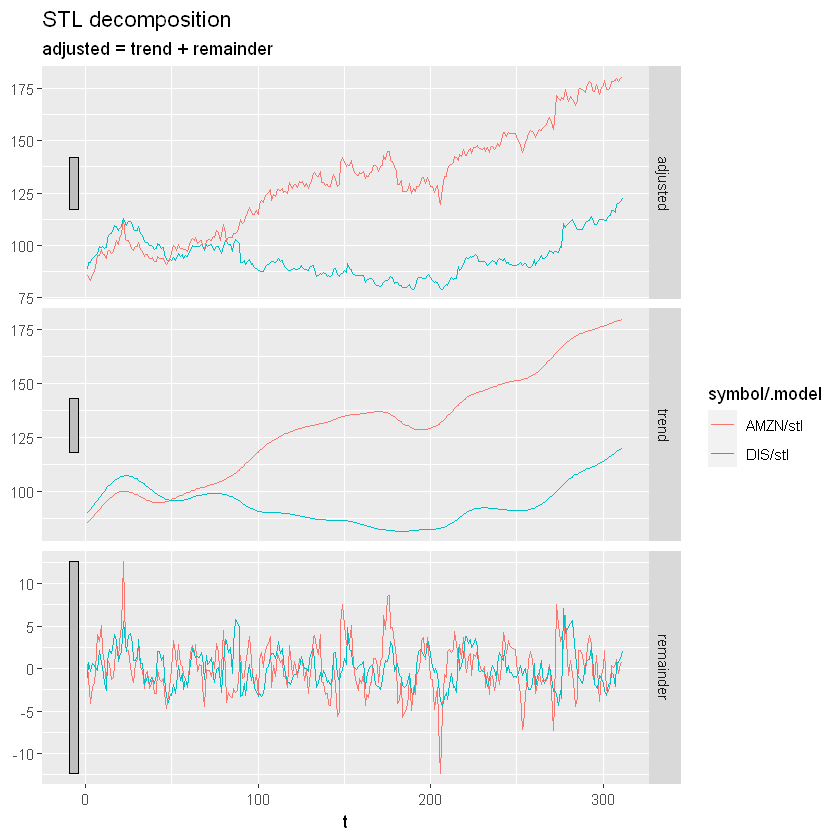

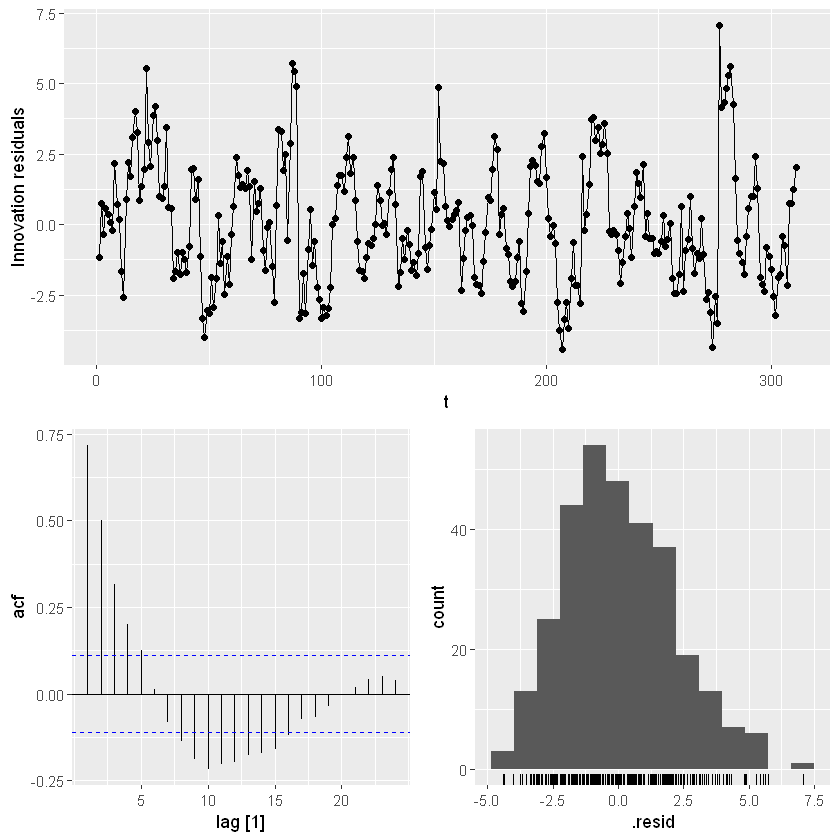

In [13]:
fit = data %>% model(stl = STL(adjusted))
fit |>
  components() |>
  autoplot()
filter(fit, symbol == "DIS") %>% gg_tsresiduals()

Warning message in max(vapply(x$seasons, `[[`, double(1L), "period")):
"no non-missing arguments to max; returning -Inf"


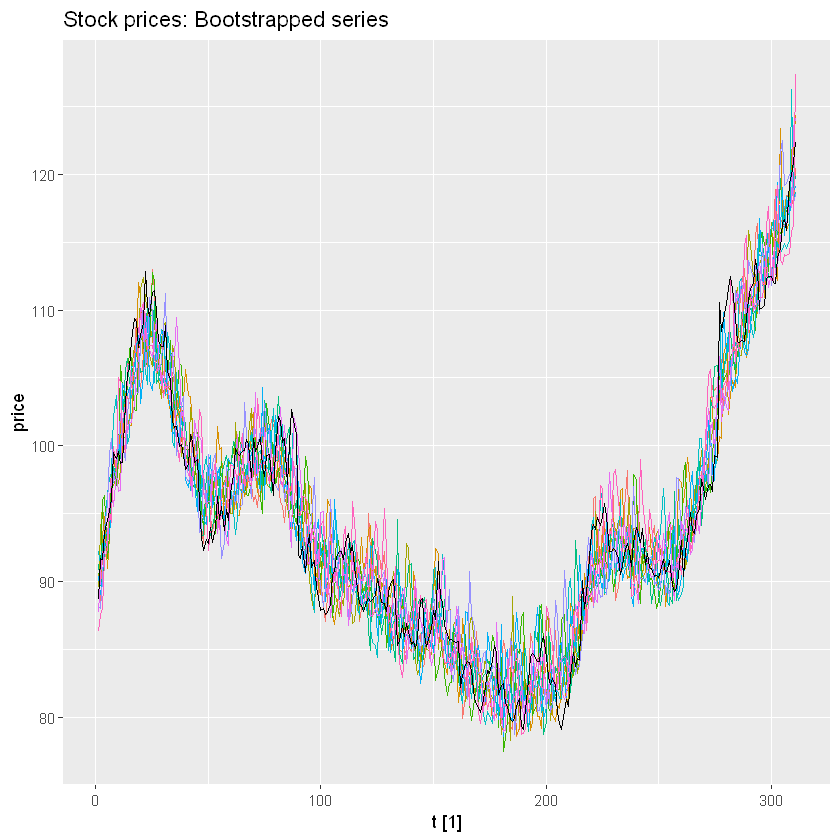

In [14]:
filter(fit, symbol == "DIS") %>%
  generate(new_data = data, times = 10,
           bootstrap_block_size = 8) |>
  autoplot(.sim) +
  autolayer(filter(data, symbol=="DIS"), adjusted, colour = "black") +
  guides(colour = "none") +
  labs(title = "Stock prices: Bootstrapped series",
       y="price")

Warning message in max(vapply(x$seasons, `[[`, double(1L), "period")):
"no non-missing arguments to max; returning -Inf"


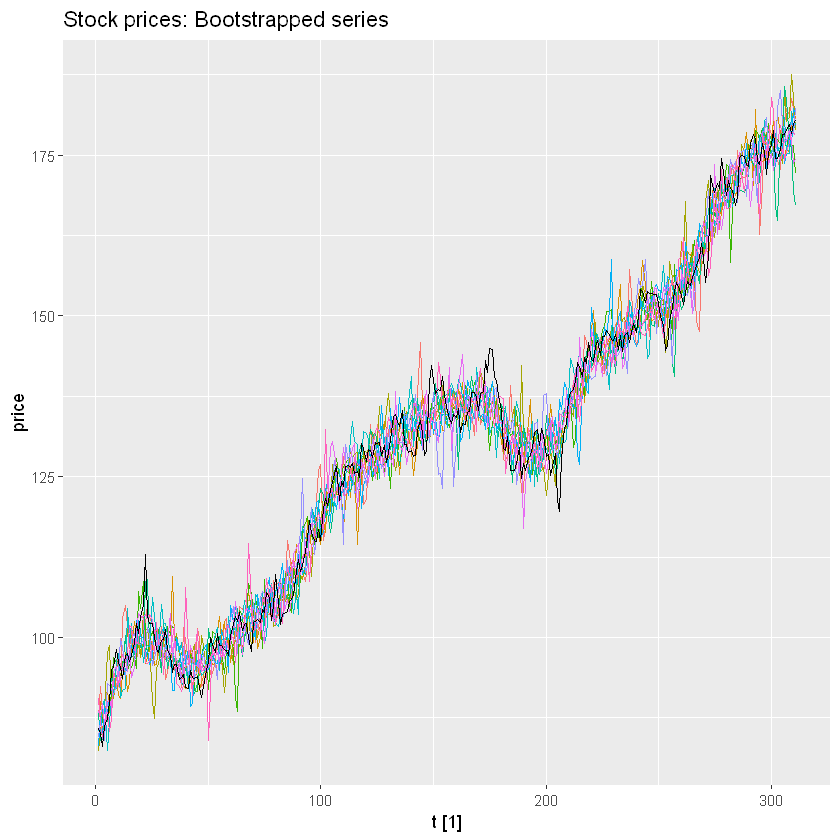

In [15]:
filter(fit, symbol == "AMZN") %>%
  generate(new_data = data, times = 10,
           bootstrap_block_size = 100) |>
  autoplot(.sim) +
  autolayer(filter(data, symbol=="AMZN"), adjusted, colour = "black") +
  guides(colour = "none") +
  labs(title = "Stock prices: Bootstrapped series",
       y="price")

## Simulación

In [16]:
sim <- fit |>
  generate(new_data = data, times = 100,
           bootstrap_block_size = 50) %>%
  select(-.model, -adjusted)
sim

Warning message in max(vapply(x$seasons, `[[`, double(1L), "period")):
"no non-missing arguments to max; returning -Inf"
Warning message in max(vapply(x$seasons, `[[`, double(1L), "period")):
"no non-missing arguments to max; returning -Inf"


symbol,.rep,date,t,.sim
<chr>,<chr>,<date>,<int>,<dbl>
AMZN,1,2023-01-03,1,79.70698
AMZN,1,2023-01-04,2,81.07918
AMZN,1,2023-01-05,3,86.46761
AMZN,1,2023-01-06,4,86.66147
AMZN,1,2023-01-09,5,90.80370
AMZN,1,2023-01-10,6,92.61622
AMZN,1,2023-01-11,7,91.00351
AMZN,1,2023-01-12,8,91.84616
AMZN,1,2023-01-13,9,92.28781


Warning message in sqrt(diag(best$var.coef)):
"NaNs produced"
Warning message in sqrt(diag(best$var.coef)):
"NaNs produced"
Warning message in sqrt(diag(best$var.coef)):
"NaNs produced"


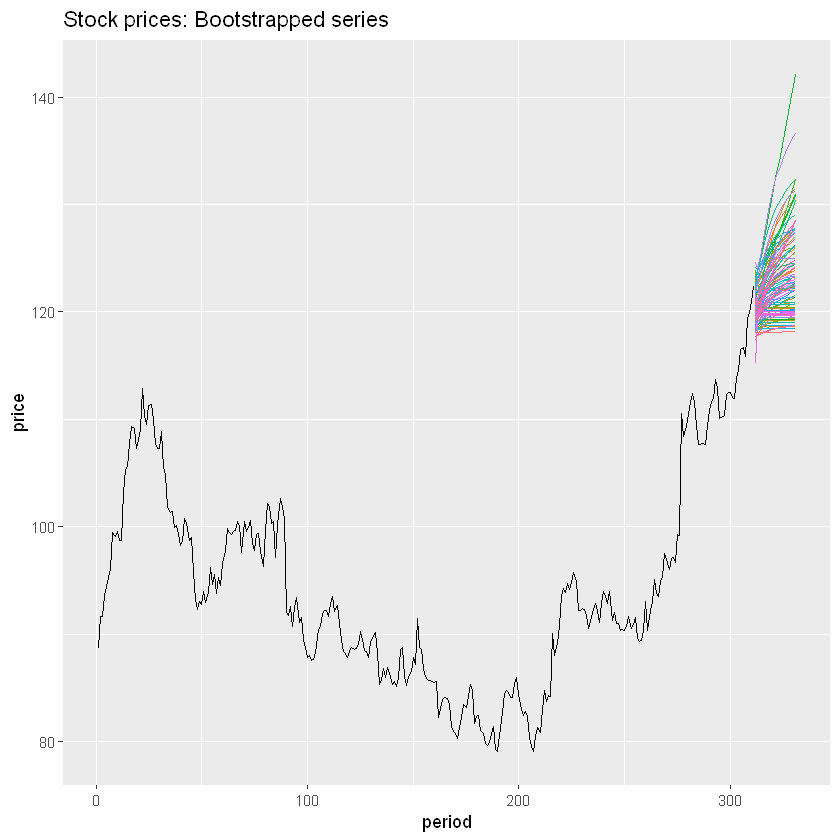

In [18]:
arima_forecasts <- sim |>
  model(arima = ARIMA(.sim)) |>
  forecast(h = 20)
arima_forecasts |> filter(symbol=="DIS") %>%
  as_tsibble(key = c(".rep", "symbol"), index = t) %>%
  autoplot(.mean) +
  autolayer(filter(data, symbol=="DIS"), adjusted, colour = "black") +
  guides(colour = "none") +
  labs(title = "Stock prices: Bootstrapped series",y="price", x = "period")

In [19]:
bagged <- arima_forecasts |>  group_by(symbol) %>%
  summarise(bagged_mean = mean(.mean))

Plot variable not specified, automatically selected `.vars = adjusted`
Plot variable not specified, automatically selected `.vars = bagged_mean`


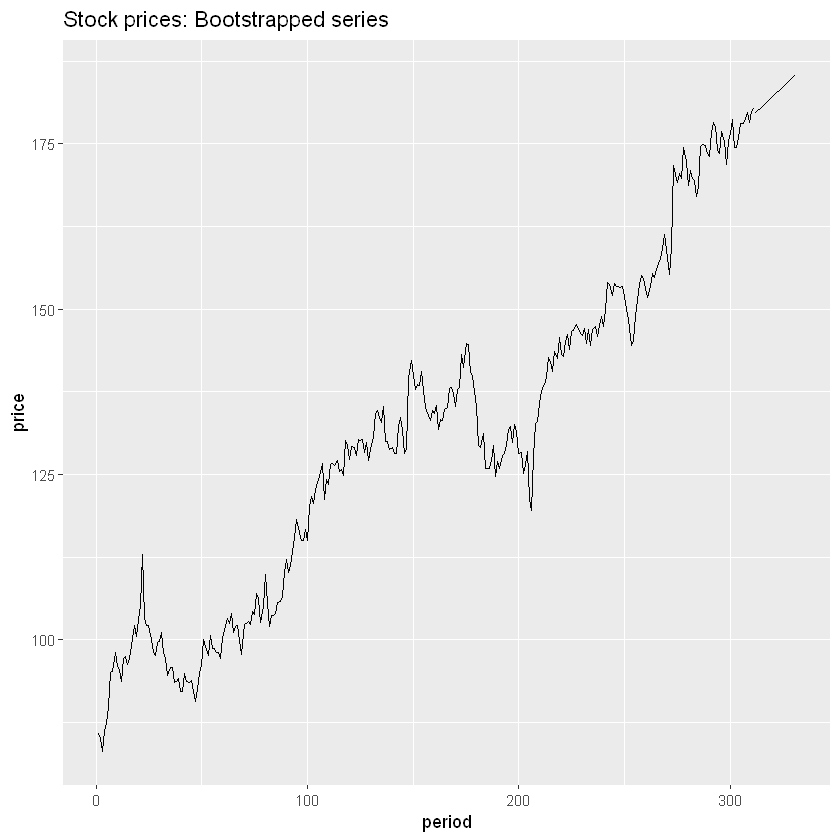

In [20]:
data |> filter(symbol=="AMZN") %>%
  autoplot() +
  autolayer(filter(bagged, symbol=="AMZN")) +
  labs(title = "Stock prices: Bootstrapped series",y="price", x = "period")

## Ensamble

In [21]:
STLF <- decomposition_model(
  STL(adjusted ~ season(window = Inf)),
  ETS(season_adjust ~ season("N"))
)

fit_ensamble = data %>% model(
                            ets = ETS(adjusted),
                            arima = ARIMA(adjusted),
                            STLF
) %>% mutate(combination = (ets + arima + STLF)/3)

fc = fit_ensamble %>% forecast(h = 20)

In [22]:
fit_ensamble

symbol,ets,arima,STLF,combination
<chr>,<model>,<model>,<model>,<model>
AMZN,"<ETS(A,A,N)>","<ARIMA(2,1,2) w/ drift>",<STL decomposition model>,<COMBINATION>
DIS,"<ETS(M,Ad,N)>","<ARIMA(1,1,0)>",<STL decomposition model>,<COMBINATION>


In [23]:
accuracy(fit_ensamble) %>% arrange(MAPE)

symbol,.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DIS,combination,Training,0.066835168,1.628925,1.134069,0.04724468,1.196303,0.9858829,0.9874508,-0.009553288
DIS,ets,Training,0.045527553,1.626558,1.137901,0.02591266,1.200455,0.9892142,0.9860156,-0.005650786
DIS,STLF,Training,0.045527553,1.626558,1.137901,0.02591266,1.200455,0.9892142,0.9860156,-0.005650786
DIS,arima,Training,0.109450399,1.646922,1.147420,0.08990873,1.209712,0.9974891,0.9983606,-0.003562896
AMZN,arima,Training,-0.000818154,2.444578,1.850818,-0.02590863,1.470288,0.9843763,0.9697725,-0.008945892
AMZN,combination,Training,-0.013290393,2.468076,1.864299,-0.03820096,1.480952,0.9915462,0.9790940,0.024073773
AMZN,ets,Training,-0.019526513,2.497630,1.881690,-0.04434712,1.494156,1.0007957,0.9908183,0.039737903
AMZN,STLF,Training,-0.019526513,2.497630,1.881690,-0.04434712,1.494156,1.0007957,0.9908183,0.039737903


`mutate_if()` ignored the following grouping variables:
* Column `symbol`


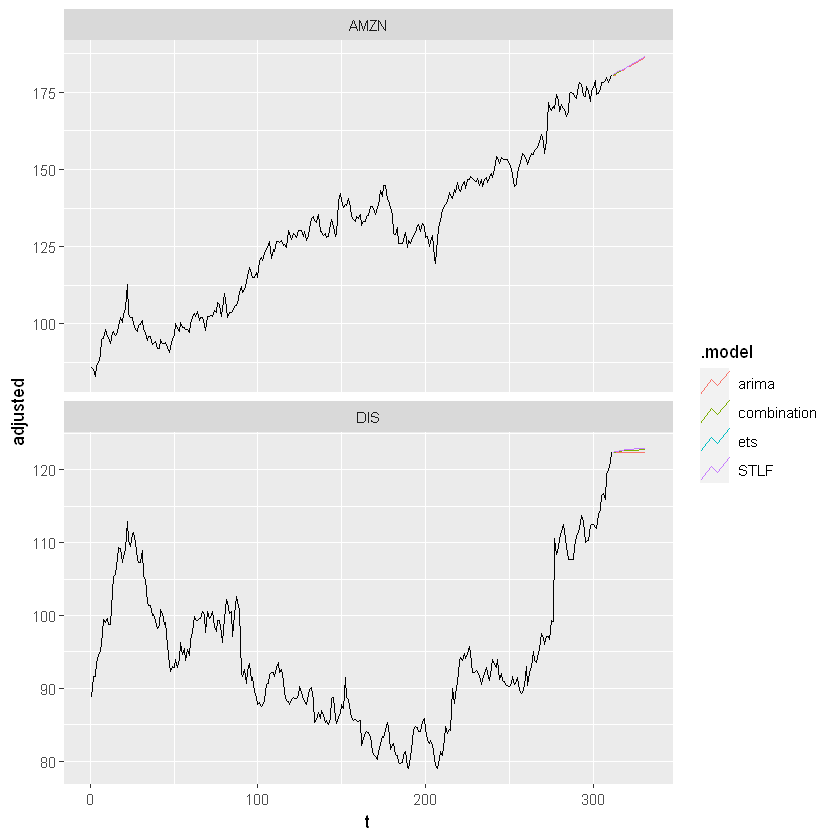

In [24]:
fc %>% autoplot(data, level=NULL)

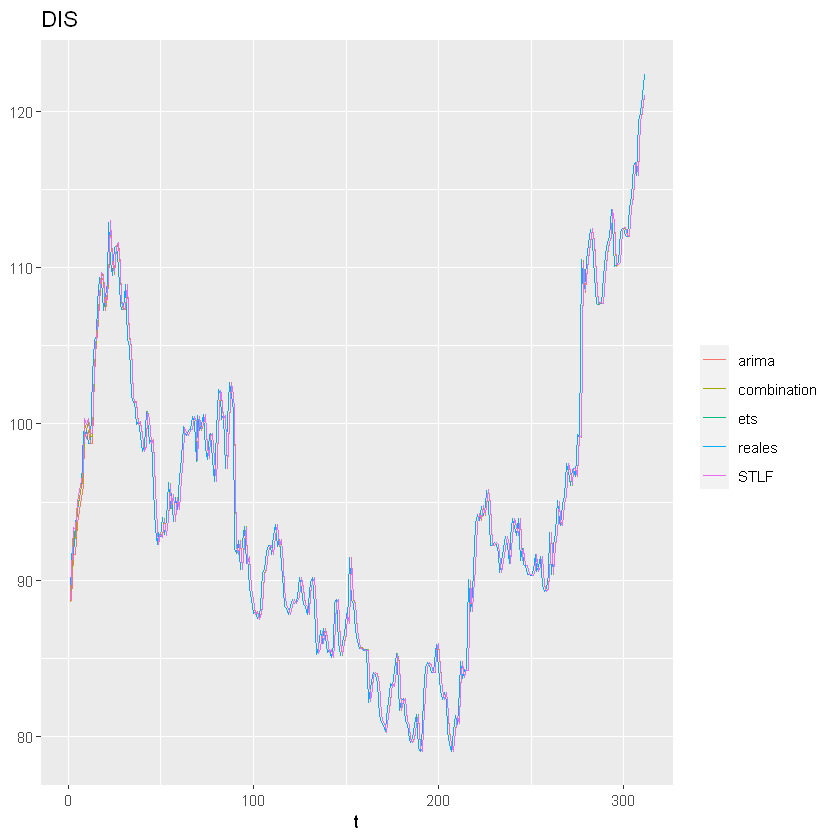

In [25]:
ticker = "DIS"
fit_ensamble %>% filter(symbol == ticker) %>% augment() |>
  ggplot(aes(x = t)) +
  geom_line(aes(y = adjusted, colour = "reales")) +
  geom_line(aes(y = .fitted, colour = .model)) +
  labs(y = NULL,
    title = ticker
  ) +
  guides(colour = guide_legend(title = NULL))

# Garch

In [26]:
data = tq_get(c("AMZN", "DIS"), get = "stock.prices", from = "2023-01-01", to = "2024-03-29") %>% select(symbol, date, adjusted)
data

symbol,date,adjusted
<chr>,<date>,<dbl>
AMZN,2023-01-03,85.82
AMZN,2023-01-04,85.14
AMZN,2023-01-05,83.12
AMZN,2023-01-06,86.08
AMZN,2023-01-09,87.36
AMZN,2023-01-10,89.87
AMZN,2023-01-11,95.09
AMZN,2023-01-12,95.27
AMZN,2023-01-13,98.12


In [27]:
data = data %>% group_by(symbol) %>% mutate(t = row_number(),
                                            diff = difference(adjusted),
                                            return = RETURN(adjusted))
data = as_tsibble(data, key = symbol, index = t)
data

symbol,date,adjusted,t,diff,return
<chr>,<date>,<dbl>,<int>,<dbl>,<dbl>
AMZN,2023-01-03,85.82,1,NA,NA
AMZN,2023-01-04,85.14,2,-0.68000031,-0.0079235645
AMZN,2023-01-05,83.12,3,-2.01999664,-0.0237255891
AMZN,2023-01-06,86.08,4,2.95999908,0.0356111524
AMZN,2023-01-09,87.36,5,1.27999878,0.0148698740
AMZN,2023-01-10,89.87,6,2.51000214,0.0287317092
AMZN,2023-01-11,95.09,7,5.21999359,0.0580838259
AMZN,2023-01-12,95.27,8,0.18000031,0.0018929468
AMZN,2023-01-13,98.12,9,2.85000610,0.0299150436


`mutate_if()` ignored the following grouping variables:
* Column `symbol`
Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


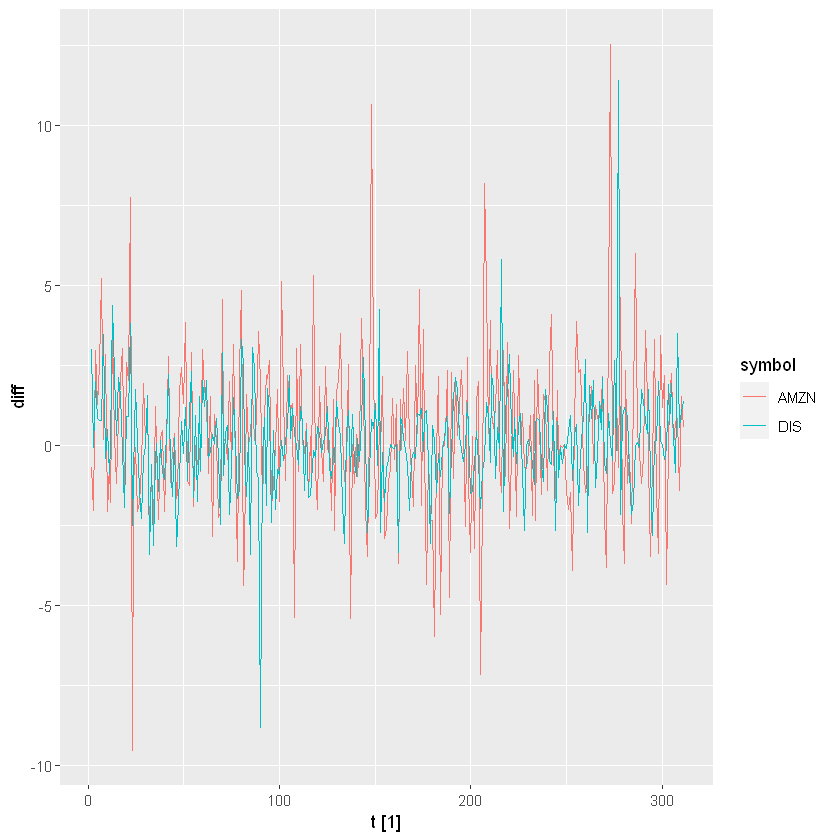

In [28]:
data %>% autoplot(diff)

`mutate_if()` ignored the following grouping variables:
* Column `symbol`
Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


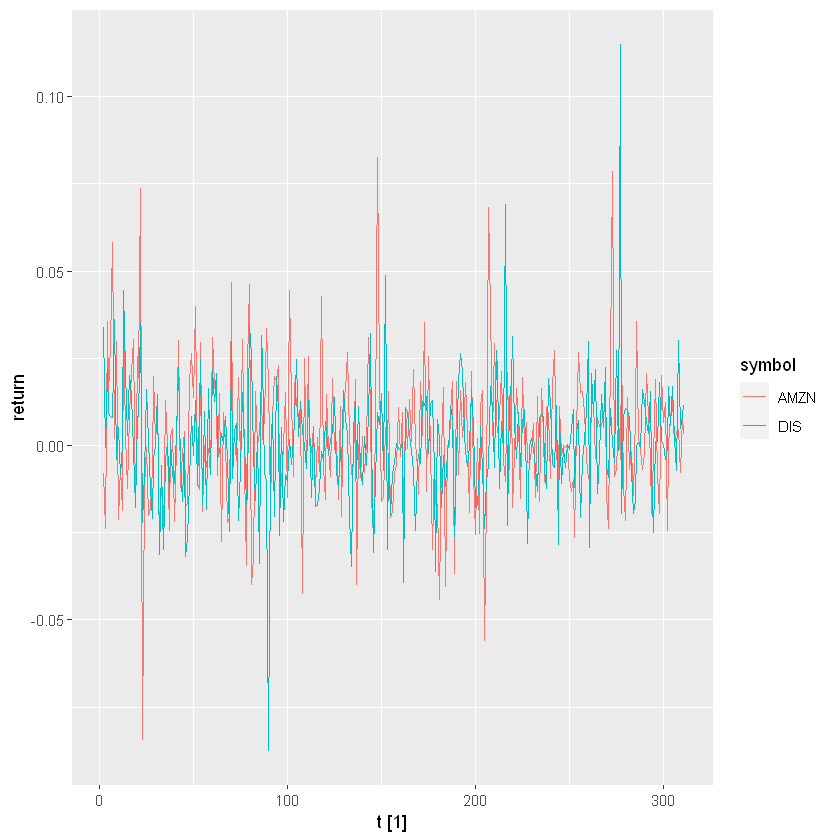

In [29]:
data %>% autoplot(return)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite values (`stat_bin()`)."


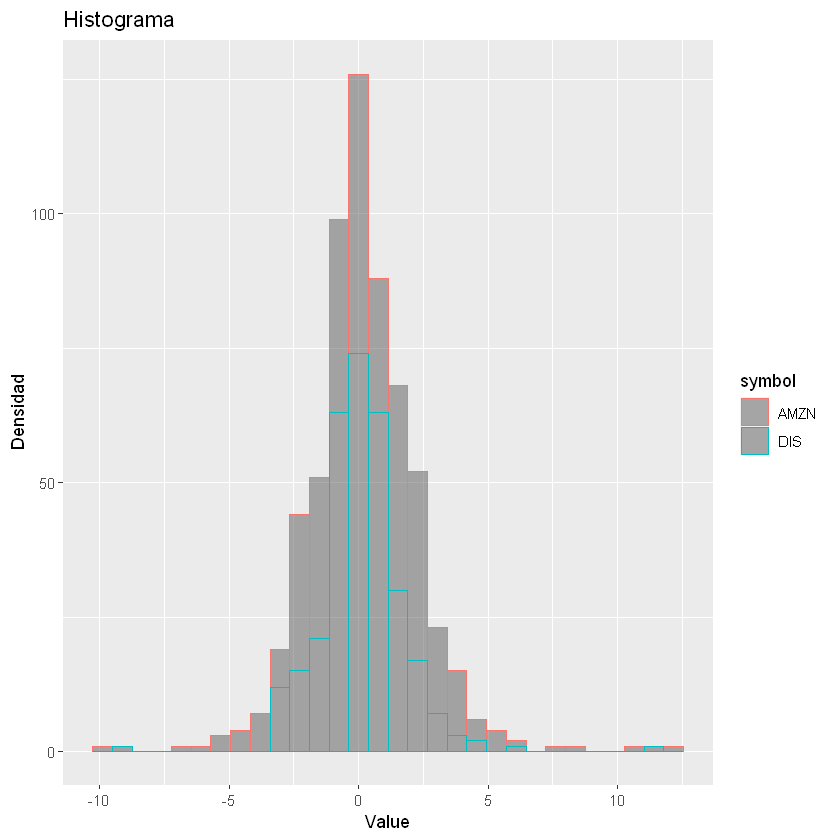

In [30]:
ggplot(data, aes(x = diff, colour = symbol)) +
  geom_histogram(alpha = 0.5) +
  labs(title = "Histograma",
       x = "Value",
       y = "Densidad")

In [31]:
as_tibble(data) %>% group_by(symbol) %>% reframe(skewness(return))

as_tibble(data) %>% group_by(symbol) %>% reframe(shapiro.test(x=return)$p.value)

symbol,skewness(return)
<chr>,<dbl>
AMZN,0.2992490
DIS,0.6704822


symbol,shapiro.test(x = return)$p.value
<chr>,<dbl>
AMZN,3.723079e-06
DIS,1.775109e-11


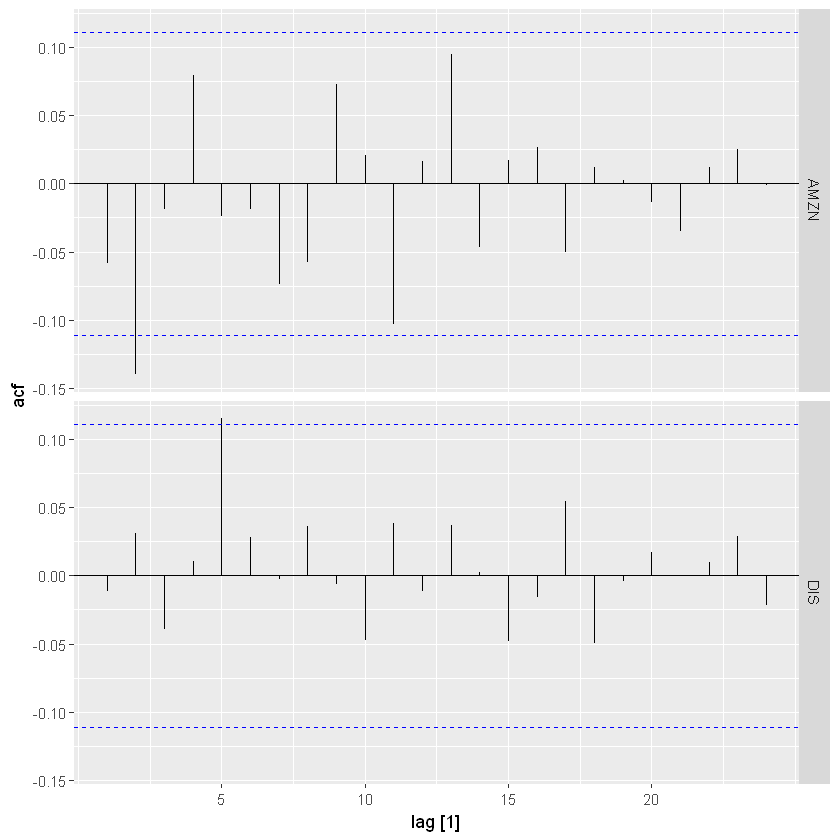

In [32]:
data %>% ACF(return) %>% autoplot()

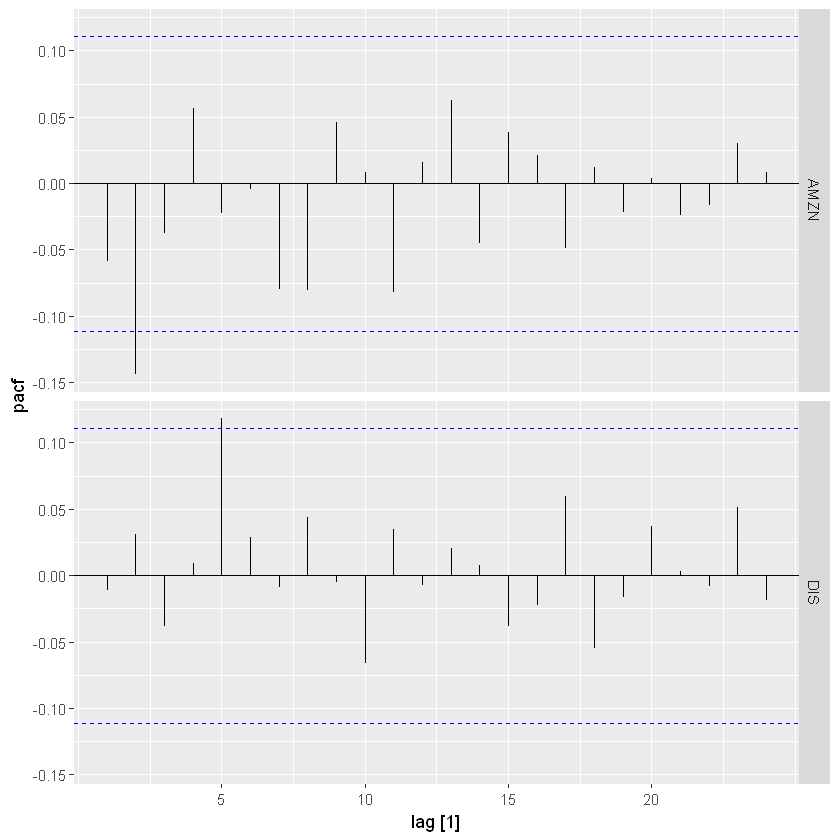

In [33]:
data %>% PACF(return) %>% autoplot()

In [34]:
library(rugarch)

ERROR: Error in library(rugarch): there is no package called 'rugarch'


In [ ]:
ticker = "DIS"
data_garch = data %>% filter(symbol == ticker)

garchSpec <- ugarchspec(
           variance.model=list(model="sGARCH", garchOrder=c(1,1)),
           distribution.model="norm")
garchFit <- ugarchfit(spec=garchSpec, data=na.omit(data_garch$return))
garchFit

In [ ]:
garchSpec <- ugarchspec(mean.model = list(armaOrder=c(0,0)),
                        variance.model = list(model="sGARCH", garchOrder=c(1,3)),
           distribution.model="norm")
garchFit <- ugarchfit(spec=garchSpec, data=na.omit(data_garch$return))
garchFit

In [ ]:
setfixed(garchSpec) = as.list(coef(garchFit))

In [ ]:
sim = ugarchpath(spec = garchSpec, m.sim = 100, n.sim = 20, r.seed = 123)
sim

In [ ]:
plot.zoo(fitted(sim))

In [ ]:
last_price = filter(data, symbol == ticker)$adjusted[max(data$t)]
forecast_price = last_price*apply(fitted(sim), 2, 'cumsum')+last_price

In [ ]:
matplot(forecast_price, type = "l", lwd=3)

In [ ]:
apply(forecast_price, 1, 'mean')